# 5. Network analysis: centrality measures

Here, we want to assign a value of relevance or importance to each node relative to the network.

In order to do that, there are many centrality metrics that focus in different properties of the network to provide a degree of importance or centrality.

To illustrate each centrality measure, we will use Florentine families network [1].

**Importing Libs**

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

**Loading example from NetworkX**

In [2]:
G = nx.florentine_families_graph()
bw_centrality = nx.betweenness_centrality(G, normalized=True)

**Defining position of nodes based on "spring" layout**

In [ ]:
pos = nx.spring_layout(G, iterations=50, seed=0)

**Visualization of families network**

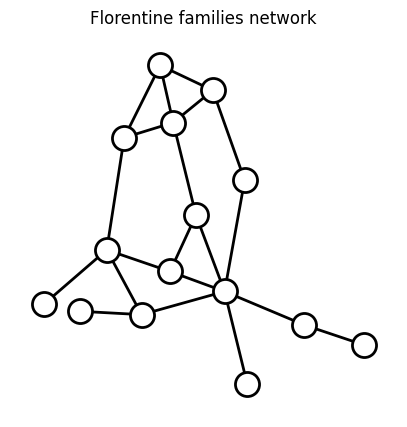

In [7]:
fig, axs = plt.subplots(figsize=(5,5), facecolor='w', nrows=1, ncols=1) #, gridspec_kw={'width_ratios': [1.5, 1]})
sc = nx.draw_networkx_nodes(G, pos, node_color='white', linewidths=2, edgecolors='k', ax=axs)
nx.draw_networkx_edges(G, pos, width=2, ax=axs); axs.axis('off')
_ = axs.set_title("Florentine families network", fontsize=12)

---

## 5.1. Centrality measures

### 5.1.1. Degree centrality

The degree centrality of a node correspond to the amount of connections that it has. The higher the degree the more important the node is [2].

In networkx, we can get the degree centrality using the method `nx.degree_centrality(G)`, with `G` the Graph.

In [8]:
nx.degree_centrality(G)

{'Acciaiuoli': 0.07142857142857142,
 'Medici': 0.42857142857142855,
 'Castellani': 0.21428571428571427,
 'Peruzzi': 0.21428571428571427,
 'Strozzi': 0.2857142857142857,
 'Barbadori': 0.14285714285714285,
 'Ridolfi': 0.21428571428571427,
 'Tornabuoni': 0.21428571428571427,
 'Albizzi': 0.21428571428571427,
 'Salviati': 0.14285714285714285,
 'Pazzi': 0.07142857142857142,
 'Bischeri': 0.21428571428571427,
 'Guadagni': 0.2857142857142857,
 'Ginori': 0.07142857142857142,
 'Lamberteschi': 0.07142857142857142}

It returns a `dict`-like object. Its `keys` correspond to the name of the family (node property) and their `values` correspond to the amount of edges or connections that each node. This value is normalized by dividing by the maximum possible degree in a simple graph $n-1$ where n is the number of nodes in graph $G$ [3].

One way to store the cenrtality values into a numpy array is by iterating over the list of values as shown below:

In [14]:
degree_centrality = np.array(list(nx.degree_centrality(G).values()))
degree_centrality

array([0.07142857, 0.42857143, 0.21428571, 0.21428571, 0.28571429,
       0.14285714, 0.21428571, 0.21428571, 0.21428571, 0.14285714,
       0.07142857, 0.21428571, 0.28571429, 0.07142857, 0.07142857])

We can visualize the degree centrality of each node by including these values as a input vector of `node_color` from `draw_networkx_nodes` function.

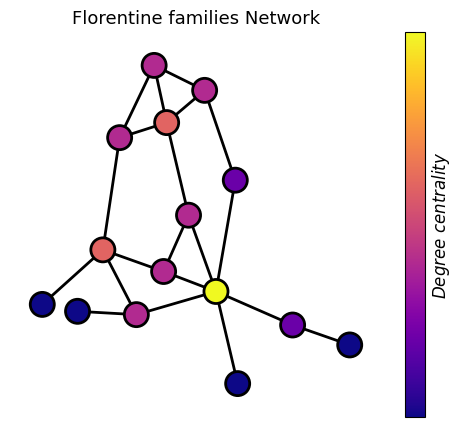

In [16]:
pos = nx.spring_layout(G, iterations=50, seed=0)
fig, axs = plt.subplots(figsize=(6,5), facecolor='w', nrows=1, ncols=1) #, gridspec_kw={'width_ratios': [1.5, 1]})
sc = nx.draw_networkx_nodes(
    G, pos, node_color=degree_centrality, 
    linewidths=2, edgecolors='k', ax=axs, cmap='plasma')
nx.draw_networkx_edges(G, pos, width=2, ax=axs)
axs.axis('off'); axs.set_title("Florentine families Network", fontsize=13)
cbar = plt.colorbar(sc, ax=axs, ticks=[])
cbar.set_label("$Degree\ centrality$", fontsize=12)

### 5.1.2. Closeness centrality

The distance between two nodes $u$ and $v$ ($d(v,u)$) correspond to the amount of edges needed to reach node $u$ from $v$.

The closeness centrality of a node $u$, denoted as $C(u)$, is the reciprocal of the average distance from $u$ to every reachable node.

This can be expressed as follows:

$$
C(u) = \frac{n-1}{\sum_{v=1}^{n-1} d(v,u)}.
$$



"""Closeness centrality de un nodo $u$ es el reciproco del promedio de la distancia de $u$ a cada otro nodo alcanzable."""

$C(u) = \frac{n-1}{\sum_{v=1}^{n-1} d(v,u)}$.

In [17]:
closeness_centrality = np.array(list(nx.closeness_centrality(G).values()))
closeness_centrality

array([0.36842105, 0.56      , 0.38888889, 0.36842105, 0.4375    ,
       0.4375    , 0.5       , 0.48275862, 0.48275862, 0.38888889,
       0.28571429, 0.4       , 0.46666667, 0.33333333, 0.3255814 ])

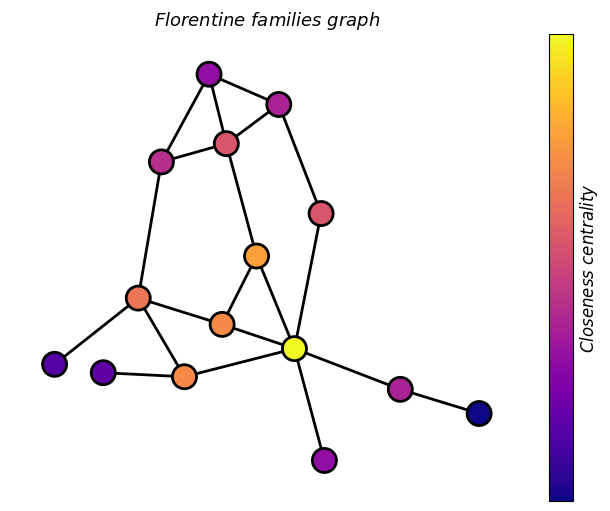

In [18]:
pos = nx.spring_layout(G, iterations=50, seed=0)
fig, axs = plt.subplots(figsize=(6,5), facecolor='w', nrows=1, ncols=1, constrained_layout=True) #, gridspec_kw={'width_ratios': [1.5, 1]})
sc = nx.draw_networkx_nodes(G, pos, node_color=closeness_centrality, linewidths=2, edgecolors='k', ax=axs, cmap='plasma')
nx.draw_networkx_edges(G, pos, width=2, ax=axs)
axs.axis('off')
axs.set_title("$Florentine\ families\ graph$", fontsize=13)
cbar = plt.colorbar(sc, ax=axs, ticks=[])
cbar.set_label("$Closeness\ centrality$", fontsize=12)

### 5.1.3. Betweenness centrality

From [Neo4j Doc](https://neo4j.com/docs/graph-data-science/current/algorithms/betweenness-centrality/): "a way of detecting the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another. The algorithm calculates shortest paths between all pairs of nodes in a graph."

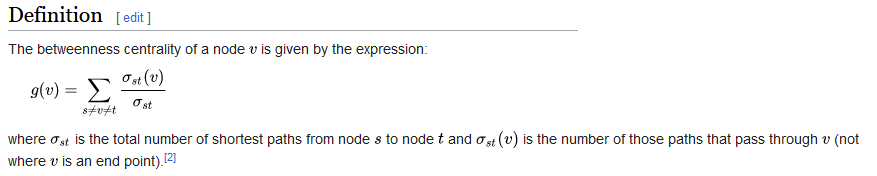

$B(u) = \sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s,t)}$. Where $V$ is the set of nodes and $\sigma(s,t)$ is the number of shortest. It is the sum of the fraction of all-pairs shortest paths that pass through any vertex in $C$.

In [ ]:
betweenness_centrality = np.array(list(nx.betweenness_centrality(G).values()))
betweenness_centrality

array([0.        , 0.52197802, 0.05494505, 0.02197802, 0.1025641 ,
       0.09340659, 0.11355311, 0.09157509, 0.21245421, 0.14285714,
       0.        , 0.1043956 , 0.25457875, 0.        , 0.        ])

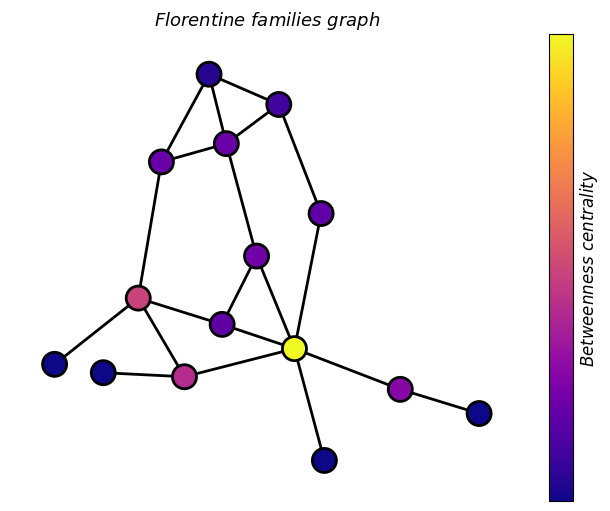

In [ ]:
pos = nx.spring_layout(G, iterations=50, seed=0)
fig, axs = plt.subplots(figsize=(6,5), facecolor='w', nrows=1, ncols=1, constrained_layout=True) #, gridspec_kw={'width_ratios': [1.5, 1]})
sc = nx.draw_networkx_nodes(G, pos, node_color=betweenness_centrality, linewidths=2, edgecolors='k', ax=axs, cmap='plasma')
nx.draw_networkx_edges(G, pos, width=2, ax=axs)
axs.axis('off')
axs.set_title("$Florentine\ families\ graph$", fontsize=13)
cbar = plt.colorbar(sc, ax=axs, ticks=[])
cbar.set_label("$Betweenness\ centrality$", fontsize=12)

### 5.1.4. Eigenvector centrality

+ Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node $i$ is the $i$-th element of the vector $x$ defined by the equation $A x = \lambda x$; where $A$ is the adjacency matrix of the graph $G$ with eigenvalue $\lambda$. By virtue of the Perron-Frobenius theorem, there is a unique solution $x$, all of whose entries are positive, if $\lambda$ is the largest eigenvalue of the adjacency matrix $A$.

In [ ]:
eigenvector_centrality = np.array(list(nx.eigenvector_centrality(G).values()))
eigenvector_centrality

array([0.13215732, 0.43031543, 0.25902004, 0.27572244, 0.35597303,
       0.21170575, 0.34155443, 0.3258467 , 0.24396053, 0.14592084,
       0.04481494, 0.2827944 , 0.28911716, 0.07492453, 0.08879253])

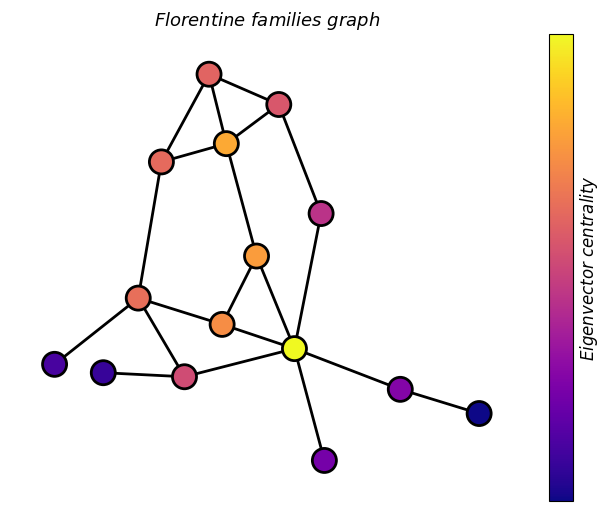

In [ ]:
pos = nx.spring_layout(G, iterations=50, seed=0)
fig, axs = plt.subplots(figsize=(6,5), facecolor='w', nrows=1, ncols=1, constrained_layout=True) #, gridspec_kw={'width_ratios': [1.5, 1]})
sc = nx.draw_networkx_nodes(G, pos, node_color=eigenvector_centrality, linewidths=2, edgecolors='k', ax=axs, cmap='plasma')
nx.draw_networkx_edges(G, pos, width=2, ax=axs)
axs.axis('off')
axs.set_title("$Florentine\ families\ graph$", fontsize=13)
cbar = plt.colorbar(sc, ax=axs, ticks=[])
cbar.set_label("$Eigenvector\ centrality$", fontsize=12)

## 5.2. Comparison of centrality measures

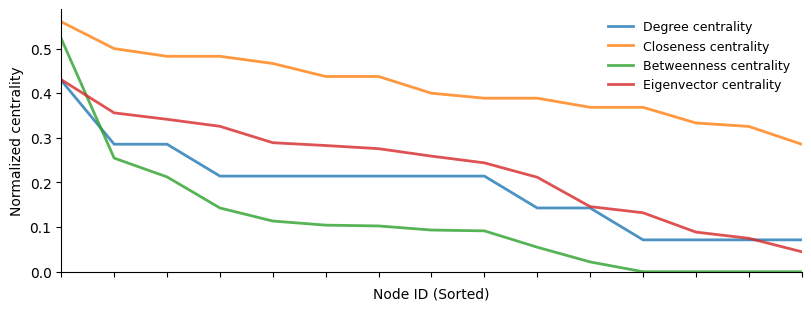

In [ ]:
# sorted
fig, axs = plt.subplots(figsize=(8, 3), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
axs.plot(np.sort(degree_centrality)[::-1]     , lw=lw, alpha=alpha, label='Degree centrality')
axs.plot(np.sort(closeness_centrality)[::-1]  , lw=lw, alpha=alpha, label='Closeness centrality')
axs.plot(np.sort(betweenness_centrality)[::-1], lw=lw, alpha=alpha, label='Betweenness centrality')
axs.plot(np.sort(eigenvector_centrality)[::-1], lw=lw, alpha=alpha, label='Eigenvector centrality')
axs.legend(frameon=False, fontsize=9, bbox_to_anchor=(1, 1.))
axs.set_xlim([0,14]); axs.set_ylim(bottom=0)
axs.set_xticks(range(15)); axs.set_xticklabels([])
axs.set_ylabel("Normalized centrality")
axs.set_xlabel("Node ID (Sorted)")
axs.spines[['right', 'top']].set_visible(False)

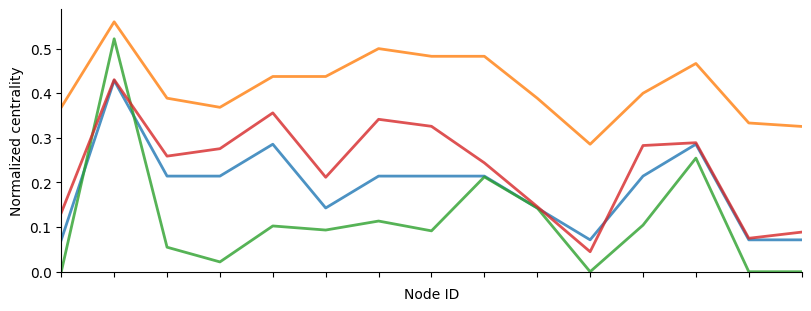

In [ ]:
alpha = 0.8; lw=2
fig, axs = plt.subplots(figsize=(8, 3), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
axs.plot(degree_centrality     , lw=lw, alpha=alpha, label='Degree centrality')
axs.plot(closeness_centrality  , lw=lw, alpha=alpha, label='Closeness centrality')
axs.plot(betweenness_centrality, lw=lw, alpha=alpha, label='Betweenness centrality')
axs.plot(eigenvector_centrality, lw=lw, alpha=alpha, label='Eigenvector centrality')
axs.set_xlim([0,14]); axs.set_ylim(bottom=0)
axs.set_xticks(range(15)); axs.set_xticklabels([])
axs.set_ylabel("Normalized centrality")
axs.set_xlabel("Node ID")
axs.spines[['right', 'top']].set_visible(False)

In [ ]:
l_centralities = [
    degree_centrality, closeness_centrality, 
    betweenness_centrality, eigenvector_centrality]
l_centrality_names = ['Degree centrality', 'Closeness centrality', 
    'Betweenness centrality', 'Eigenvector centrality']

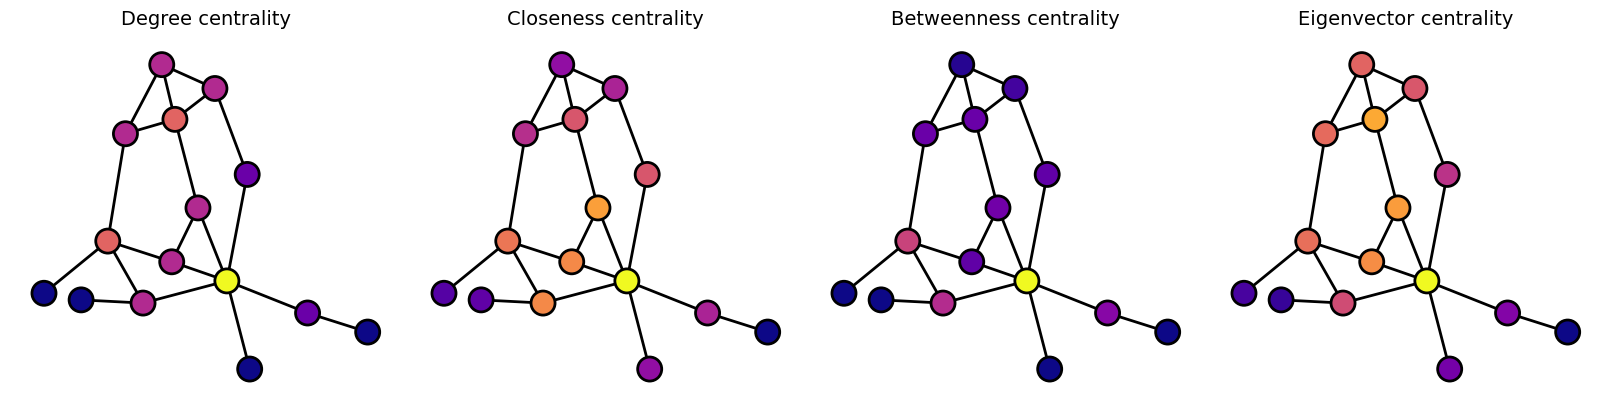

In [ ]:
pos = nx.spring_layout(G, iterations=50, seed=0)
fig, axs = plt.subplots(figsize=(4*4,4), facecolor='w', nrows=1, ncols=4, constrained_layout=True) #, gridspec_kw={'width_ratios': [1.5, 1]})

for i in range(len(l_centralities)):
  sc = nx.draw_networkx_nodes(G, pos, node_color=l_centralities[i], linewidths=2, edgecolors='k', ax=axs[i], cmap='plasma')
  nx.draw_networkx_edges(G, pos, width=2, ax=axs[i])
  axs[i].axis('off')
  axs[i].set_title(l_centrality_names[i], fontsize=14)
  #cbar = plt.colorbar(sc, ax=axs[i], ticks=[])
  #cbar.set_label("$Eigenvector\ centrality$", fontsize=12)

## References

[1] Ronald L. Breiger and Philippa E. Pattison Cumulated social roles: The duality of persons and their algebras, 1 Social Networks, Volume 8, Issue 3, September 1986, Pages 215-256

Eigenvector: [1][2].

[1]: Phillip Bonacich. “Power and Centrality: A Family of Measures.” American Journal of Sociology 92(5):1170–1182, 1986. http://www.leonidzhukov.net/hse/2014/socialnetworks/papers/Bonacich-Centrality.pdf.

[2] (1,2) Mark E. J. Newman. Networks: An Introduction. Oxford University Press, USA, 2010, pp. 169.


[2] Golbeck, J. (2015). Introduction to social media investigation: A hands-on approach. Syngress.

[3] https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html

----